In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np

### Importing the training data

In [3]:
training_set = pd.read_csv('fashion-mnist_train.csv')

In [4]:
training_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_x = training_set.iloc[:,1:].values
train_y = training_set.iloc[:,:1].values

In [6]:
## normalizing the data
train_x = train_x/255

In [7]:
train_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
train_x, val_x, train_y, val_y  = train_test_split(train_x, train_y, test_size=0.2)

In [9]:
train_x.shape

(48000, 784)

In [10]:
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

In [11]:
val_x.shape

(12000, 784)

### Creating AutoEncoder Architecture

In [12]:
## Input layer
input_layer = Input(shape= (784,))


## Encoding Architecture
encoding_layer1 = Dense(units = 1500, activation = 'relu')(input_layer)
encoding_layer2 = Dense(units = 400, activation= 'relu')(encoding_layer1)
encoding_layer3 = Dense(units = 100, activation= 'relu')(encoding_layer2)

## latent View

latent_view = Dense(units= 10, activation='sigmoid')(encoding_layer3)


## Decoding Architecture

decoding_layer1 = Dense(units = 100, activation = 'relu')(latent_view)
decoding_layer2 = Dense(units = 400, activation= 'relu')(decoding_layer1)
decoding_layer3 = Dense(units = 1500, activation= 'relu')(decoding_layer2)

## Output Layer

output_layer = Dense(units =784)(decoding_layer3) # Since we dont need an activation function in the output layer of autenc

model = Model(input_layer, output_layer)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 1500)              1177500   
_________________________________________________________________
dense_1 (Dense)              (None, 400)               600400    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_5 (Dense)              (None, 400)               40400 

### Training with eraly stopping

In [14]:
## model complile
model.compile(optimizer= 'adam', loss = 'mse')

## Early Stopping
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=10,verbose=0,mode= 'auto')

## Training
model.fit(train_x, train_x, epochs=100, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 3s 66us/sample - loss: 0.0964 - val_loss: 0.0709
Epoch 2/100
48000/48000 [==============================] - 1s 20us/sample - loss: 0.0602 - val_loss: 0.0497
Epoch 3/100
48000/48000 [==============================] - 1s 19us/sample - loss: 0.0440 - val_loss: 0.0405
Epoch 4/100
48000/48000 [==============================] - 1s 18us/sample - loss: 0.0380 - val_loss: 0.0356
Epoch 5/100
48000/48000 [==============================] - 1s 21us/sample - loss: 0.0333 - val_loss: 0.0313
Epoch 6/100
48000/48000 [==============================] - 1s 20us/sample - loss: 0.0297 - val_loss: 0.0282
Epoch 7/100
48000/48000 [==============================] - 1s 19us/sample - loss: 0.0273 - val_loss: 0.0261
Epoch 8/100
48000/48000 [==============================] - 1s 20us/sample - loss: 0.0255 - val_loss: 0.0247
Epoch 9/100
48000/48000 [==============================] - 1s 22us/sample - loss: 0.02

Epoch 76/100
48000/48000 [==============================] - 1s 19us/sample - loss: 0.0129 - val_loss: 0.0134
Epoch 77/100
48000/48000 [==============================] - 1s 18us/sample - loss: 0.0131 - val_loss: 0.0135
Epoch 78/100
48000/48000 [==============================] - 1s 20us/sample - loss: 0.0128 - val_loss: 0.0133
Epoch 79/100
48000/48000 [==============================] - 1s 20us/sample - loss: 0.0128 - val_loss: 0.0136
Epoch 80/100
48000/48000 [==============================] - 1s 18us/sample - loss: 0.0130 - val_loss: 0.0133
Epoch 81/100
48000/48000 [==============================] - 1s 19us/sample - loss: 0.0127 - val_loss: 0.0132
Epoch 82/100
48000/48000 [==============================] - 1s 20us/sample - loss: 0.0127 - val_loss: 0.0132
Epoch 83/100
48000/48000 [==============================] - 1s 18us/sample - loss: 0.0127 - val_loss: 0.0134
Epoch 84/100
48000/48000 [==============================] - 1s 18us/sample - loss: 0.0128 - val_loss: 0.0133
Epoch 85/100
48000/

### Prediction

In [15]:
preds = model.predict(val_x)

In [16]:
preds.shape

(12000, 784)

### Plotting the original Images using the validation data

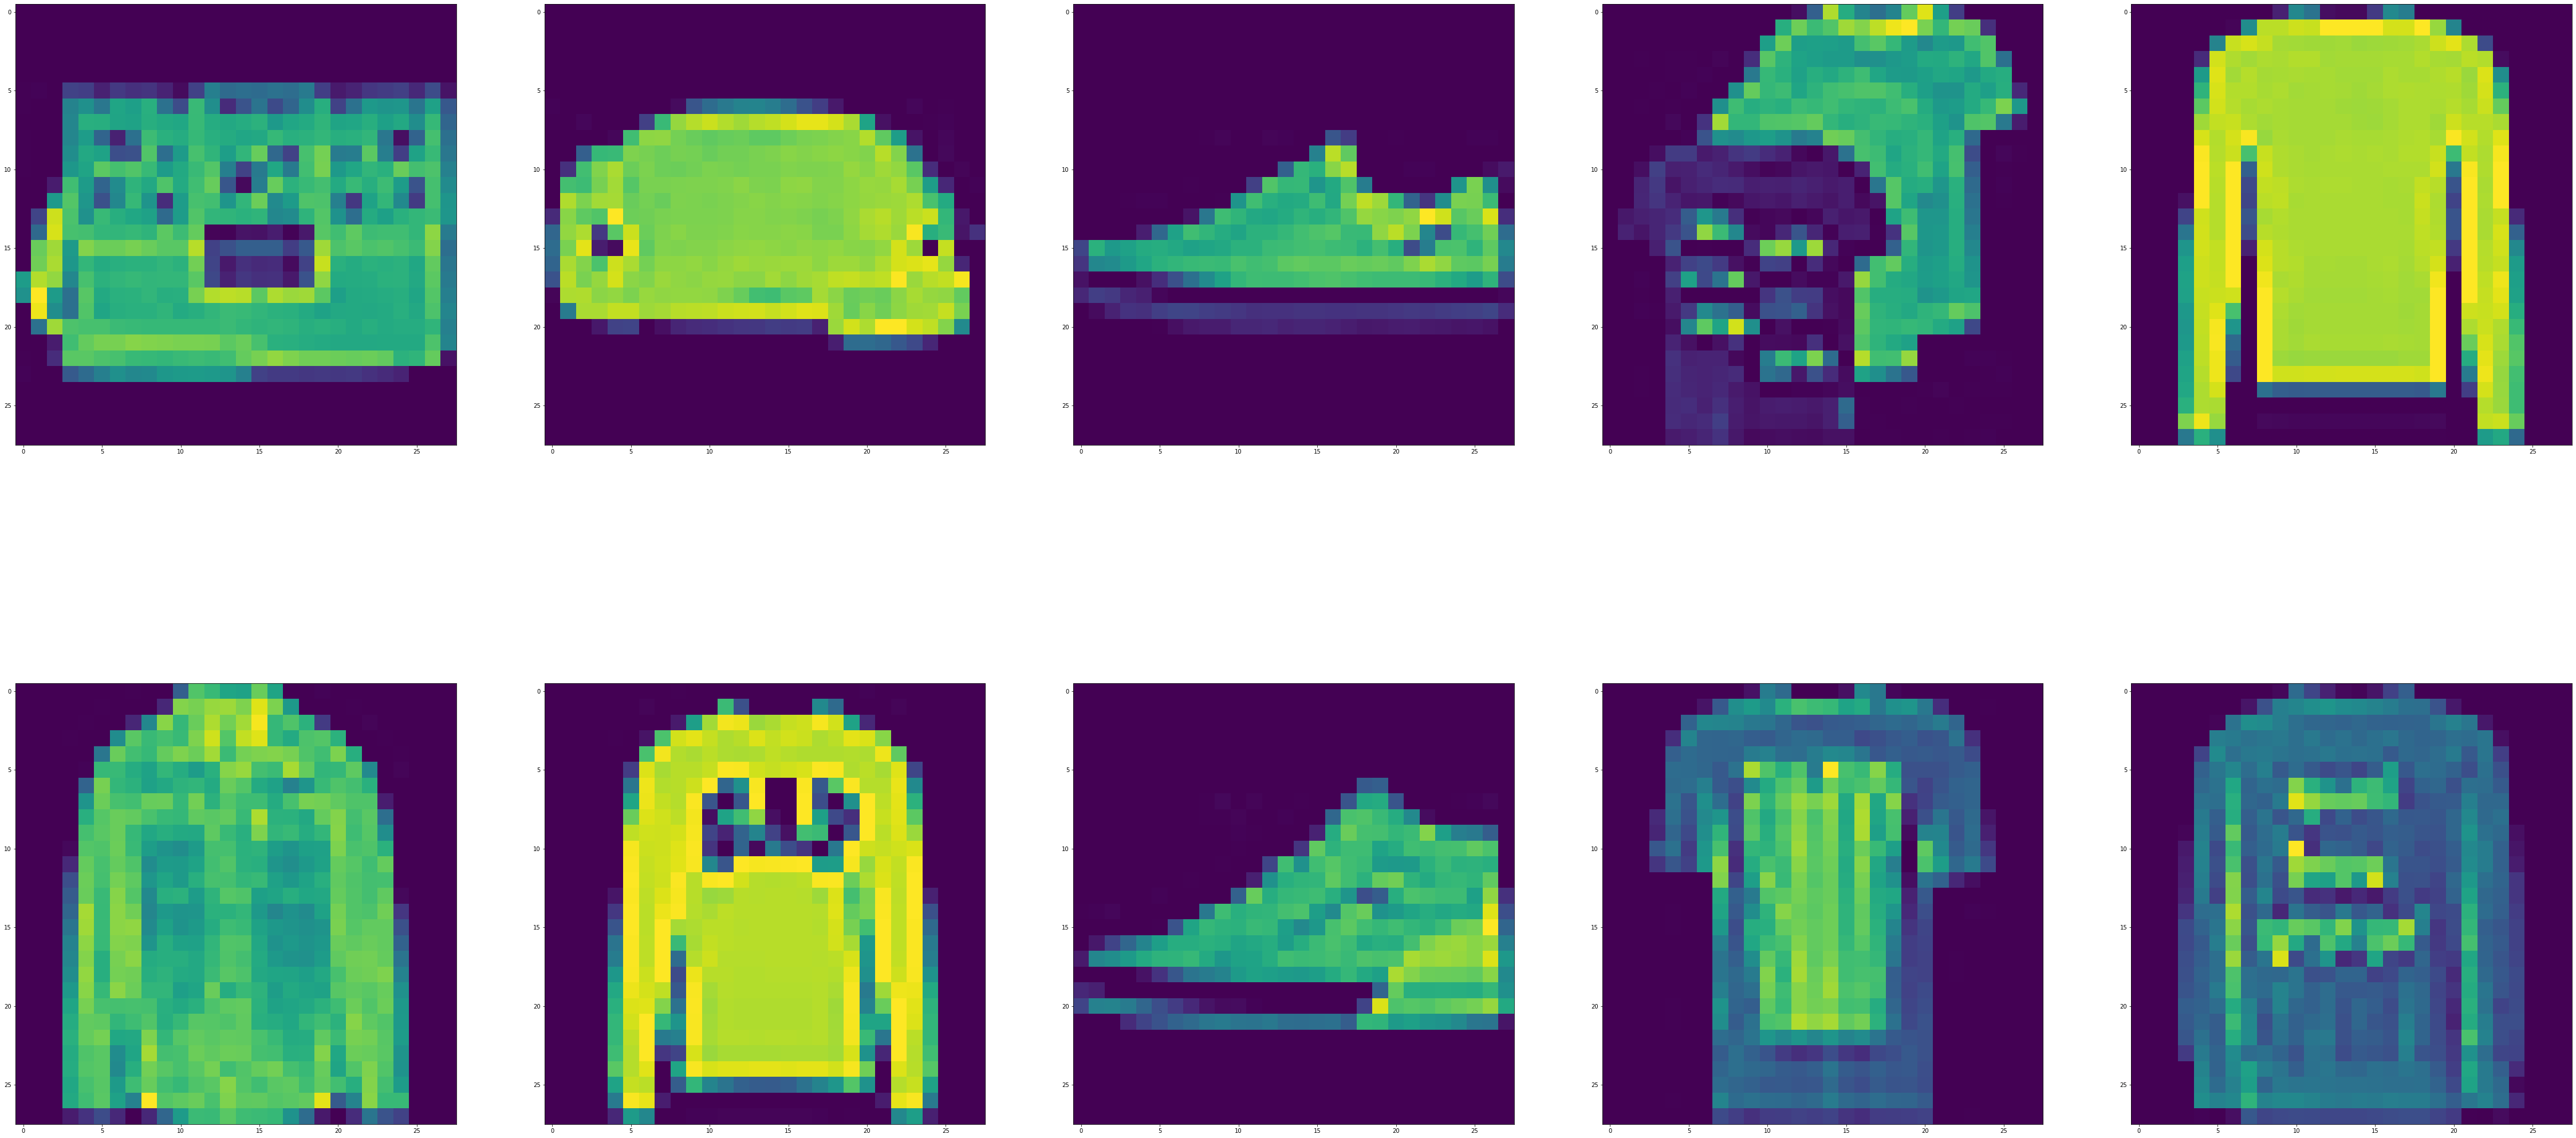

In [17]:
from PIL import Image 
f, ax = plt.subplots(2,5)
f.set_size_inches(80, 40)
x = 0
for i in range(2):
    x += 5
    for j in range(5):
        ax[i,j].imshow(val_x[j-5+x].reshape(28, 28))
        x += 1
        
plt.show()

### Plotting the Predicted Images using the predicted data

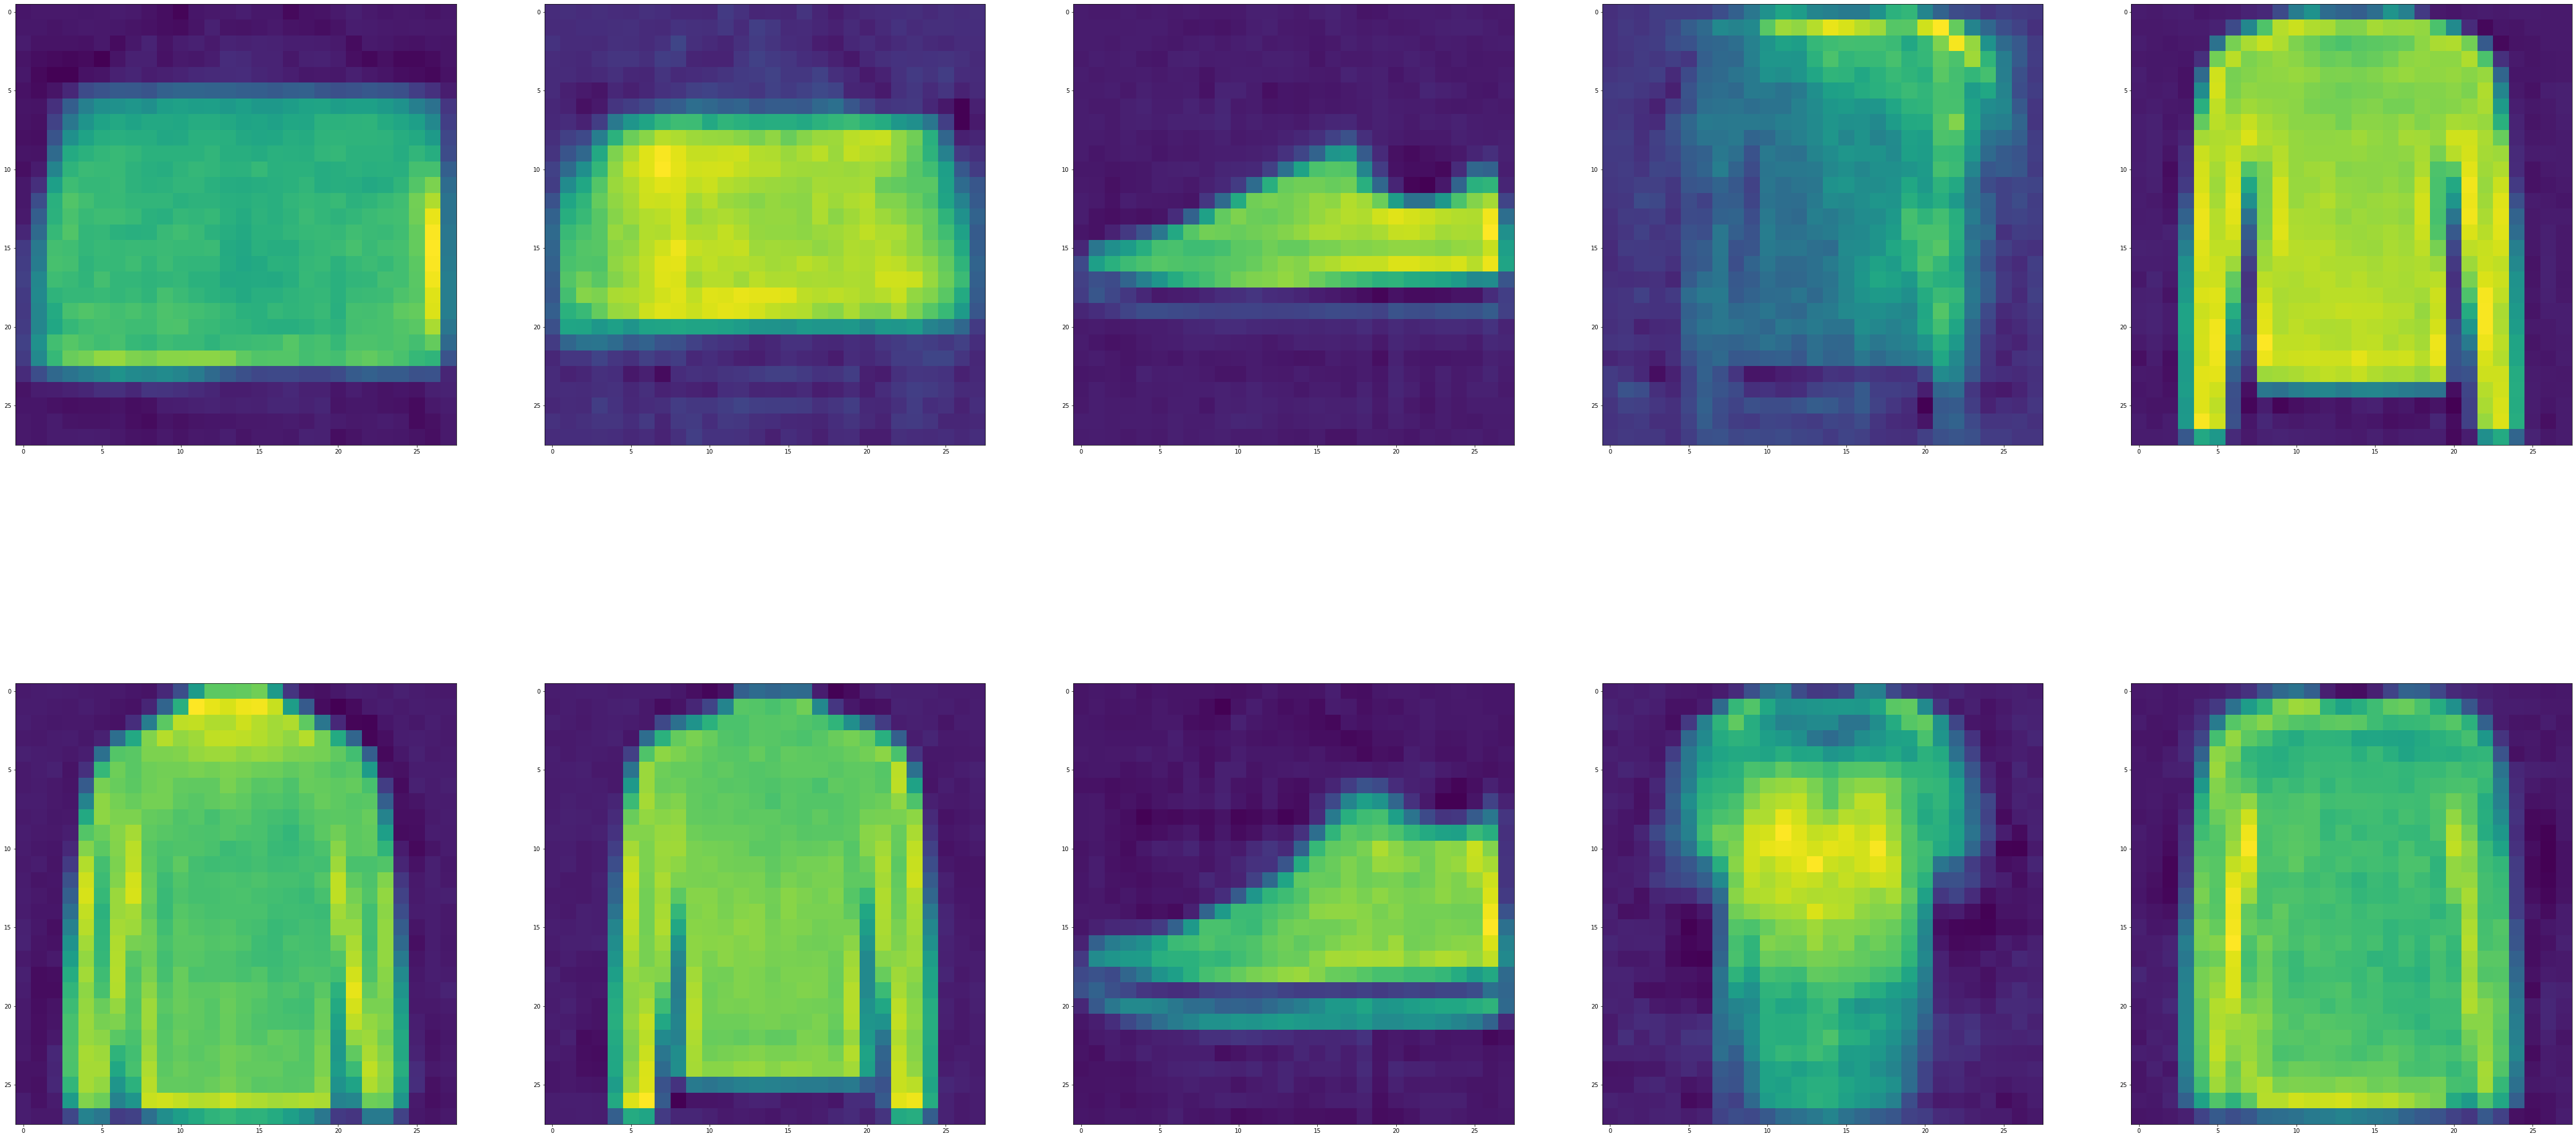

In [18]:
from PIL import Image 
f, ax = plt.subplots(2,5)
f.set_size_inches(80, 40)
x = 0
for i in range(2):
    x += 5
    for j in range(5):
        ax[i,j].imshow(preds[j-5+x].reshape(28, 28))
        x += 1
        
plt.show()